<a href="https://colab.research.google.com/github/akashsinghsharma/Laptop-Price-Predictor/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title and Business Use:
***

The project name is 'Laptop price predictor.

# Initial Data exploration
***

In [ ]:
data_path = '/content/drive/MyDrive/Data Science/Data/laptop_data.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(data_path)
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1013,1013,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.54kg,100550.5488
834,834,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,87912.0000
841,841,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,163723.5792
535,535,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,72940.3200
819,819,Dell,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.76kg,40226.4000


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

_Important observation: No Null values._

In [ ]:
df.duplicated().sum()

0

_Important Observation: No duplicates._

__Some Things to do after looking at the data__:

1. Remove column unnamed.

2. Remove 'GB' from RAM, as it serves no Purpose.

3. Remove 'Kg' from Weight.

4. Both RAM and Weight are in object format, so convert them back to int and float respectively.

In [ ]:
#1. Remove column unnamed.

df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#2. Remove 'GB' from RAM
df['Ram'] = df['Ram'].str.replace('GB','')
#3. Remove 'Kg' from Weight.
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
#4.Both RAM and Weight are in object format, so convert them back to int and float respectively.
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1083,HP,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,109170.72
434,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,512GB SSD,Nvidia Quadro M2200M,Windows 10,2.50,130482.72
144,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86,19660.32
1229,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,61218.72
467,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,40439.52


# Exploratory data analysis
***

1. Univariate Analysis
***

<ipython-input-20-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

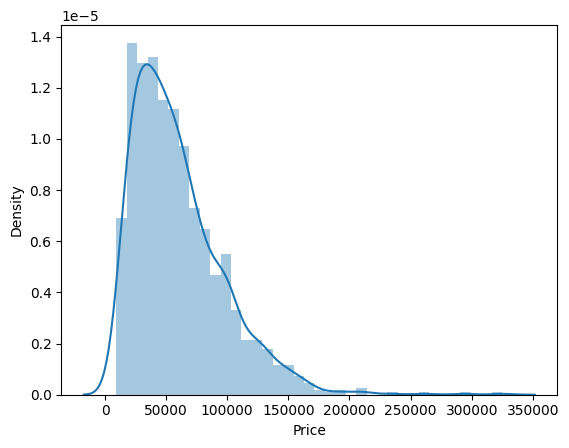

In [ ]:
sns.distplot(df['Price'])

Skewed data, some algorithms will face issues.

<Axes: >

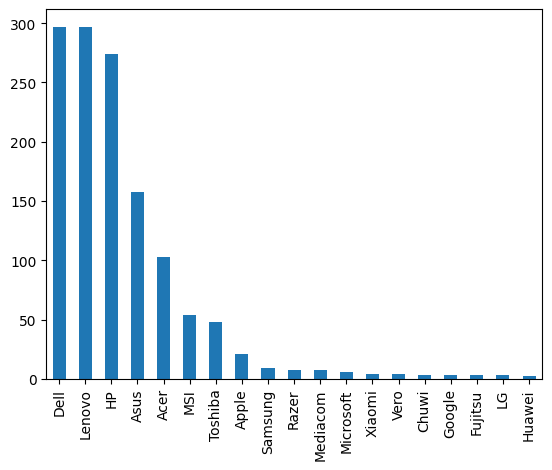

In [ ]:
df['Company'].value_counts().plot(kind='bar')

Note: We can considering removing unknown or less known brand name.

<Axes: >

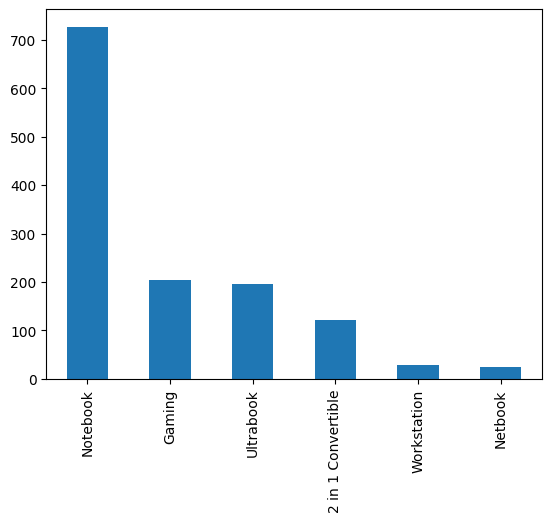

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

<ipython-input-25-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

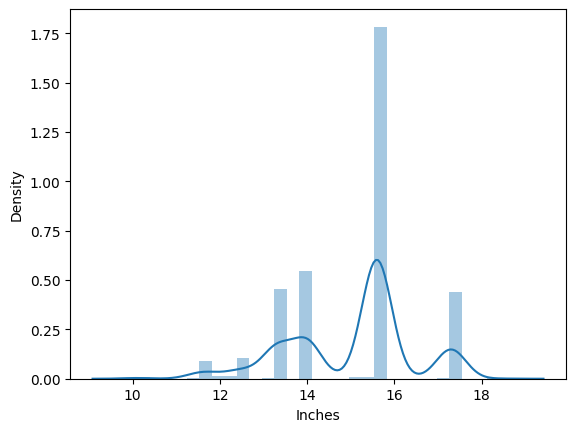

In [ ]:
sns.distplot(df['Inches'])

In [ ]:
#The info about screen resolution is very different in columns, so let's see value count.

df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

2. Bivariate Analysis
***

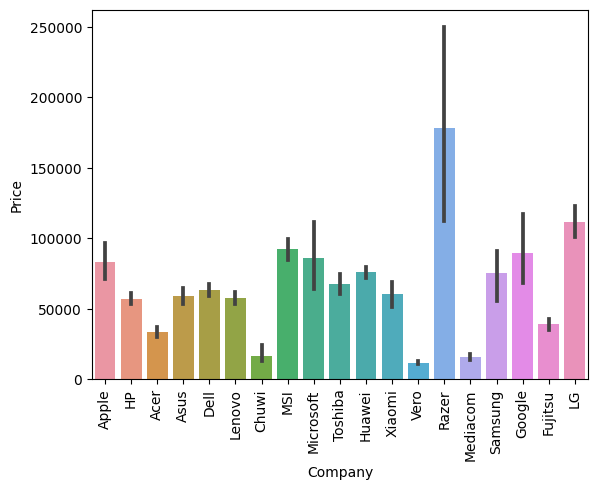

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation: Razer make most high end column, LG, apple, google, microsoft, etc. are in similar line too.
Companies like Acer, chuwi, vero, etc. are economic.

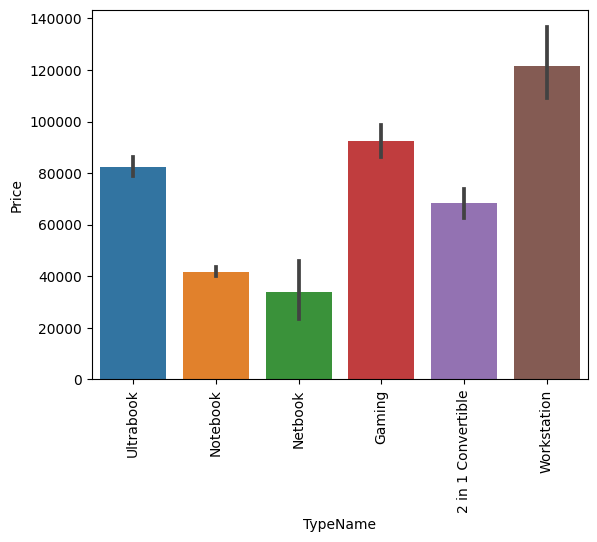

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation: Netbook and notebook are budget range.
Gaming and workstation are higher-end.

<Axes: xlabel='Inches', ylabel='Price'>

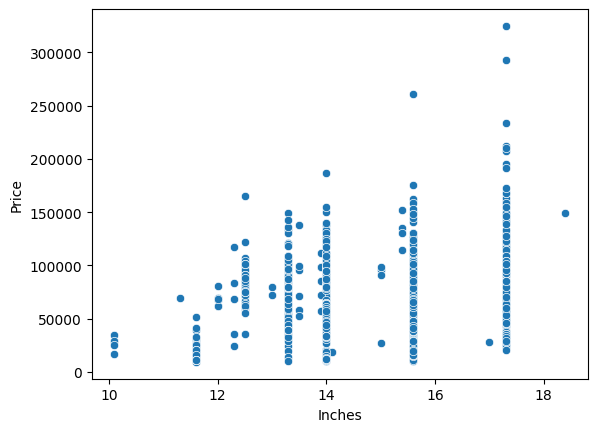

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

_Note: Size is a categorical variable, not a continous._

Observation: Larger laptops costs more, there is some relationship for more.